# # Participación de las mujeres en las elecciones congresales 2016 - Análisis de las cabezas de lista

El derecho a elegir y ser elegida no es una condición suficiente para asegurar la participación de las mujeres en la política. En compracación con los hombres, la participación de las mujeres en las elecciones es aún baja. En esa línea, para las mujeres, quienes ya tienen dificultades para acceder a puestos dentro de las listas congresales, tienen mayores impedimentos para encabezar listas u ocupar cargos de liderazgo dentro de los partidos políticos. Para ello, este trabajo intenta mostrar el porcentaje de mujeres candidatas en las elecciones 2016 que encabezaron la lista congresal en su región. Para ello, se recurrió a la base de datos de Infogob. 

In [13]:
# Importamos las librerías Panda y Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Abrimos el archivo con la base de datos (Fuente: Infogob)
file = "EG2016_Candidatos_Congresal.xlsx" 
df = pd.read_excel(file)

In [3]:
# Vemos la base de datos
df

,Distrito Electoral,Organización Política,Tipo Organización Política,Cargo,N°,Primer apellido,Segundo apellido,Prenombres,Sexo
0,AMAZONAS,ACCION POPULAR,PARTIDO POLÍTICO,CONGRESISTA,1,BUSTAMANTE,SANCHEZ,ANA MARIA,Femenino
1,AMAZONAS,ACCION POPULAR,PARTIDO POLÍTICO,CONGRESISTA,2,SESEN,MARIANO,ELIO ROLANDO,Masculino
2,AMAZONAS,FUERZA POPULAR,PARTIDO POLÍTICO,CONGRESISTA,1,CASTRO,GRANDEZ,MIGUEL ANTONIO,Masculino
3,AMAZONAS,FUERZA POPULAR,PARTIDO POLÍTICO,CONGRESISTA,2,HERRERA,AREVALO,MARITA,Femenino
4,AMAZONAS,FUERZA POPULAR,PARTIDO POLÍTICO,CONGRESISTA,3,CALVO,NANTIP,NELIDA,Femenino
...,...,...,...,...,...,...,...,...,...
1262,UCAYALI,ALIANZA PARA EL PROGRESO DEL PERU,ALIANZA ELECTORAL,CONGRESISTA,1,URCIA,AREVALO,INDIRA MARIANA,Femenino
1263,UCAYALI,ALIANZA PARA EL PROGRESO DEL PERU,ALIANZA ELECTORAL,CONGRESISTA,2,PEZO,TORRES,FRANCISCO ANTONIO,Masculino
1264,UCAYALI,ALIANZA PARA EL PROGRESO DEL PERU,ALIANZA ELECTORAL,CONGRESISTA,3,ESTRADA,TUESTA,ZENAYDA EMILIA,Femenino
1265,UCAYALI,ALIANZA POPULAR,ALIANZA ELECTORAL,CONGRESISTA,1,ALIAGA,PEREZ,SALOMON,Masculino


In [4]:
# Creamos una variable que nos diga si el/la candidato(a) encabeza la lista congresal (Si encabeza = 1, No encabeza = 0)
df['Encabeza'] = ["1" if s == 1 else "0" for s in df['N°']]

In [5]:
# Creamos una base de datos con la información sobre cuantos congresistas encabezan las listas según sexo
df1=df.groupby(['Sexo', 'Encabeza']).describe()
df1

N°                                               
                    count      mean       std  min  25%  50%   75%   max
Sexo      Encabeza                                                      
Femenino  0         444.0  8.092342  8.954514  2.0  3.0  4.0   7.0  36.0
          1          51.0  1.000000  0.000000  1.0  1.0  1.0   1.0   1.0
Masculino 0         595.0  8.929412  9.777580  2.0  2.0  4.0  13.0  36.0
          1         177.0  1.000000  0.000000  1.0  1.0  1.0   1.0   1.0

In [8]:
# Calculamos el total de candidatas a partir del recuento que muestra la variable N° count
df1= df1.iloc[[0,1]]
df1['total']= 444+51
df1

N°                                               total
                   count      mean       std  min  25%  50%  75%   max      
Sexo     Encabeza                                                           
Femenino 0         444.0  8.092342  8.954514  2.0  3.0  4.0  7.0  36.0   495
         1          51.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0   495

In [9]:
#Calculamos el porcentaje de candidatos a partir del total y el recuento ('count')
df1['porcentaje']= df1[('N°', 'count')]/df1[('total', '')]*100
df1

N°                                               total  \
                   count      mean       std  min  25%  50%  75%   max         
Sexo     Encabeza                                                              
Femenino 0         444.0  8.092342  8.954514  2.0  3.0  4.0  7.0  36.0   495   
         1          51.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0   495   

                  porcentaje  
                              
Sexo     Encabeza             
Femenino 0          89.69697  
         1          10.30303

In [10]:
# Redondeamos el porcentaje
df1['porcentaje']=round(df1[('porcentaje', '')],2)

In [11]:
# Seleccionamos los porcentajes para construir el gráfico de barras
df2= df1[('porcentaje', '')]
df2

Sexo      Encabeza
Femenino  0           89.7
          1           10.3
Name: (porcentaje, ), dtype: float64

El siguiente gráfico de barras muestra el procentaje de mujeres según la posición en la lista. En ese sentido, se grafica que un 89.7% de mujeres no encabezan la lista, mientras que solo un 10.3% de mujeres encabeza la lista congresal de su partido. 

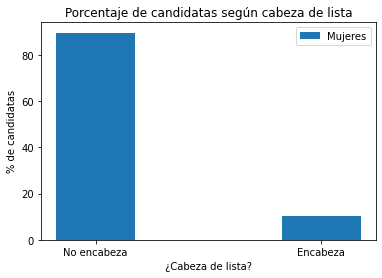

In [14]:
#Creamos el gráfico de barras
numero_de_grupos = len(df2)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
plt.bar(indice_barras + ancho_barras, df2, width=ancho_barras, label='Mujeres')
plt.legend(loc='best')
plt.xticks(indice_barras + ancho_barras, ('No encabeza', 'Encabeza'))
 
plt.ylabel('% de candidatas')
plt.xlabel('¿Cabeza de lista?')
plt.title('Porcentaje de candidatas según cabeza de lista')
 
plt.show()